<a href="https://colab.research.google.com/github/abdullahsaqib112/Movie-review-Classification-IMDB-dataset/blob/main/Movie_reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
x_val= x_train[:10000]
partial_x_train= x_train[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]


In [8]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5777 - accuracy: 0.7114 - val_loss: 0.3652 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3033 - accuracy: 0.9057 - val_loss: 0.3077 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2198 - accuracy: 0.9272 - val_loss: 0.2783 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1693 - accuracy: 0.9448 - val_loss: 0.3101 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1335 - accuracy: 0.9590 - val_loss: 0.3249 - val_accuracy: 0.8755
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1077 - accuracy: 0.9677 - val_loss: 0.3231 - val_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0890 - accuracy: 0.9752 - val_loss: 0.3213 - val_accuracy: 0.8836
Epoch 8/20
30

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

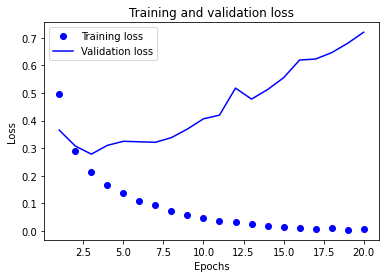

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

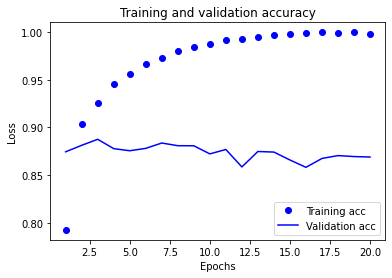

In [11]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#restructuring of model
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512) 

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5540 - accuracy: 0.7366
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2711 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2044 - accuracy: 0.9294
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1649 - accuracy: 0.9442


In [ ]:
results=model.evaluate(x_test,y_test)
results

In [ ]:
model.predict(x_test)